In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {'Marketing Spend (Million $)' : [23, 26, 30, 34, 43, 48],
       'Sales (Million $)' : [651, 762, 856, 1063, 1190, 1298]}

data = pd.DataFrame(data)
data

,Marketing Spend (Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Marketing Spend (Million $)  6 non-null      int64
 1   Sales (Million $)            6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


<Axes: xlabel='Marketing Spend (Million $)', ylabel='Sales (Million $)'>

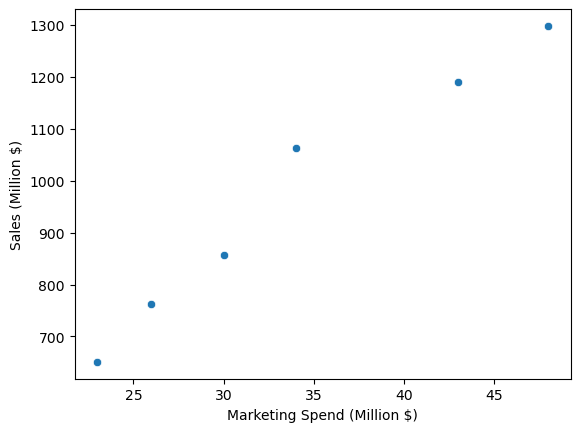

In [3]:
sns.scatterplot(data=data, x='Marketing Spend (Million $)', y='Sales (Million $)')

In [11]:
scaler = MinMaxScaler()
data[['Marketing Spend (Million $)', 'Sales (Million $)']] = \
scaler.fit_transform(data[['Marketing Spend (Million $)', 'Sales (Million $)']])
data

,Marketing Spend (Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


<Axes: xlabel='Marketing Spend (Million $)', ylabel='Sales (Million $)'>

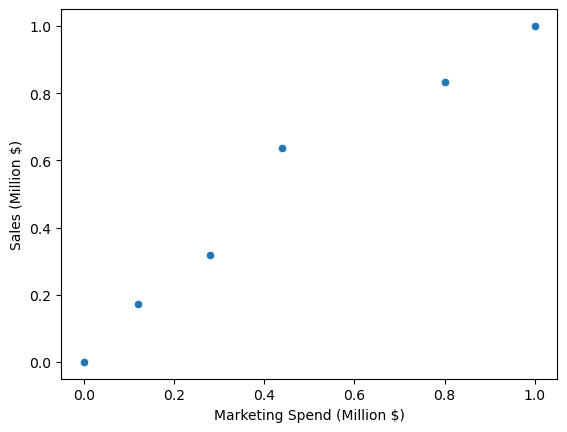

In [12]:
sns.scatterplot(data=data, x='Marketing Spend (Million $)', y='Sales (Million $)')

## Build a Linear Regression Model

In [23]:
X = data['Marketing Spend (Million $)'].values.reshape(-1,1)
y = data['Sales (Million $)'].values.reshape(-1,1)

print(X)
print(y)

[[0.  ]
 [0.12]
 [0.28]
 [0.44]
 [0.8 ]
 [1.  ]]
[[0.        ]
 [0.17156105]
 [0.31684699]
 [0.63678516]
 [0.83307573]
 [1.        ]]


In [14]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [15]:
y_pred = reg.predict(X)
y_pred

array([[0.05907859],
       [0.17743302],
       [0.33523892],
       [0.49304482],
       [0.8481081 ],
       [1.04536548]])

In [16]:
r2_score(y_true=y, y_pred=y_pred)

0.9652190930694494

In [17]:
rss = np.sum(np.square(y - y_pred))
print(rss)

mse = mean_squared_error(y, y_pred)
print(mse)

rmse = mse ** 0.5
print(rmse)

0.026808307381756876
0.004468051230292812
0.06684348308019872


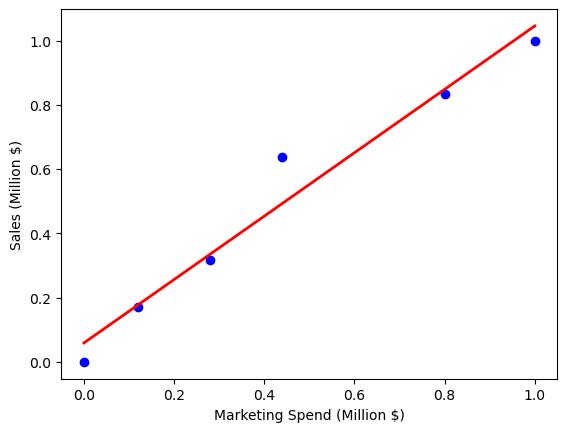

In [21]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red', linewidth=2)
plt.xlabel('Marketing Spend (Million $)')
plt.ylabel('Sales (Million $)')
plt.show()

### Building a Polinomial Feature of degree 5

In [24]:
degree = 5
polyReg5 = PolynomialFeatures(degree=degree)
X_poly5 = polyReg5.fit_transform(X)
linReg5 = LinearRegression()
linReg5.fit(X_poly5, y)

LinearRegression()

#### Plot the graph

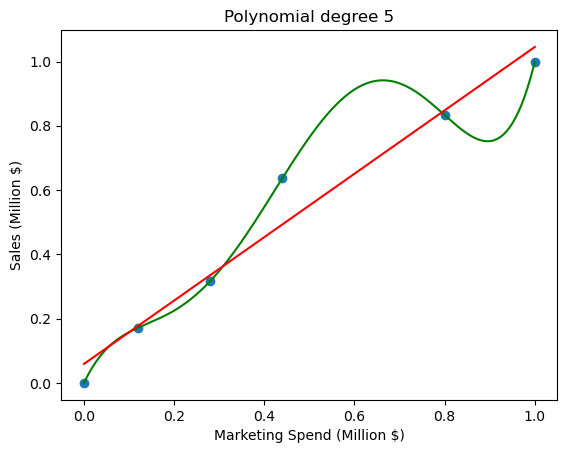

In [27]:
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq, linReg5.predict(polyReg5.fit_transform(X_seq)), color='green')
plt.plot(X_seq, reg.predict(X_seq), color='red')
plt.title(f'Polynomial degree {degree}')
plt.xlabel('Marketing Spend (Million $)')
plt.ylabel('Sales (Million $)')
plt.show()

In [56]:
linReg5.coef_

array([[  0.        ,   2.94295226, -19.85351777,  71.18543313,
        -95.27426562,  41.99939801]])

In [28]:
y_pred5 = linReg5.predict(polyReg5.fit_transform(X))
r2_score(y, y_pred5)

1.0

In [29]:
rss = np.sum(np.square(y - y_pred5))
print(rss)

mse = mean_squared_error(y, y_pred5)
print(mse)

rmse = mse ** 0.5
print(rmse)

2.9829419276251713e-28
4.9715698793752853e-29
7.050936022525864e-15


## Ridge Regression

In [52]:
def ridgeRegression(true_X, X_seq, degree):
    lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    
    for (i, value) in enumerate(lambdas):
        ridgeCoef = PolynomialFeatures(degree=degree)
        X_poly = ridgeCoef.fit_transform(true_X)
        rideReg = Ridge(alpha=value)
        rideReg.fit(X_poly, y)
        
        
        plt.title(f'Polynomial with Lambda {lambdas[i]} and str degree {degree}')
        plt.scatter(true_X, y)
        plt.plot(X_seq, rideReg.predict(ridgeCoef.fit_transform(X_seq)), color = 'green')
        plt.plot(X_seq, reg.predict(X_seq), color = 'red')
        plt.show()
        
        y_pred_ridge = rideReg.predict(ridgeCoef.fit_transform(X))
        print("r2_score", r2_score(y, y_pred_ridge))
        print("Coef", rideReg.coef_)
        print("intercept", rideReg.intercept_)

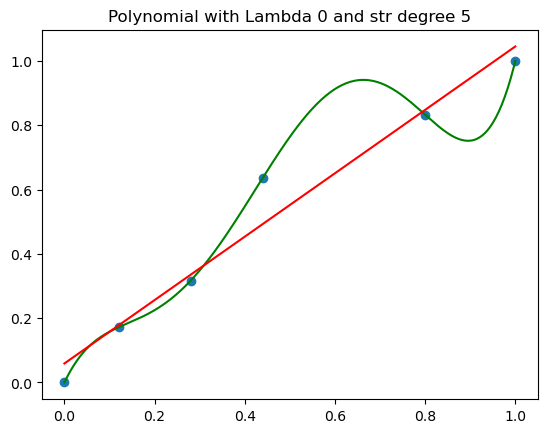

r2_score 1.0
Coef [[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]
intercept [-9.43689571e-16]


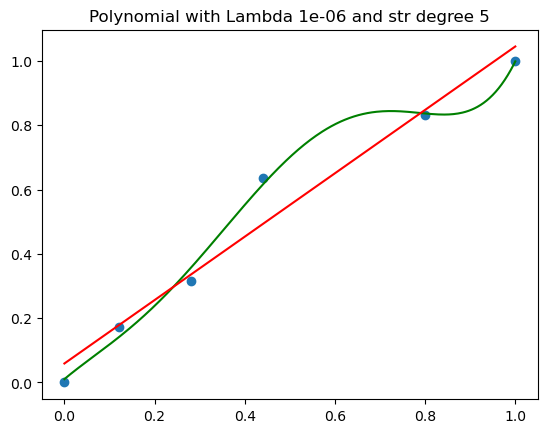

r2_score 0.9959843384092048
Coef [[  0.           1.18322805  -2.3459275   15.37178399 -26.33060246
   13.11003382]]
intercept [0.01049364]


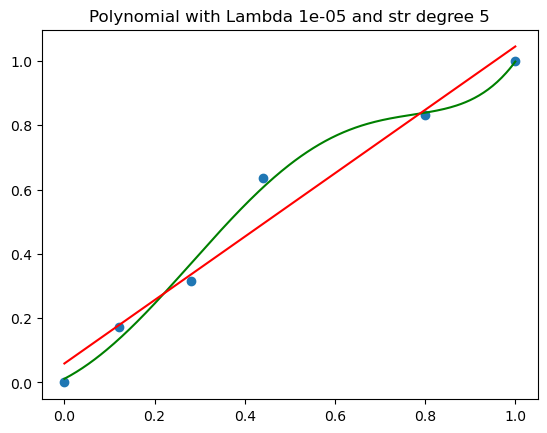

r2_score 0.993180683151278
Coef [[ 0.          0.7335743   2.57231599 -1.04309812 -5.53143897  4.25543599]]
intercept [0.01152731]


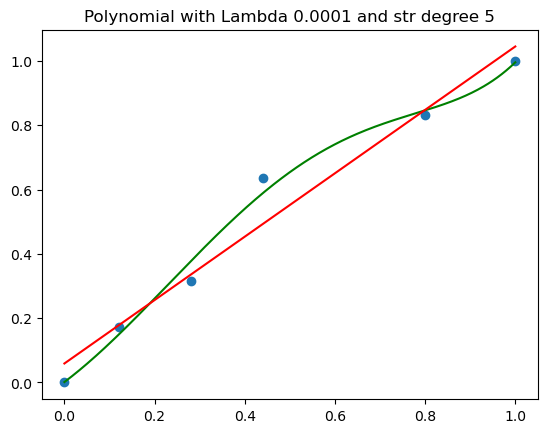

r2_score 0.9913850776520905
Coef [[ 0.          1.05952518  1.63237157 -1.89808203 -1.7222708   1.92323438]]
intercept [0.00129138]


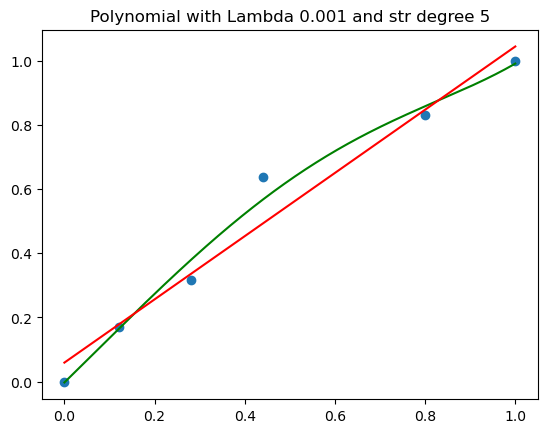

r2_score 0.9877944050899673
Coef [[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]
intercept [-0.00289774]


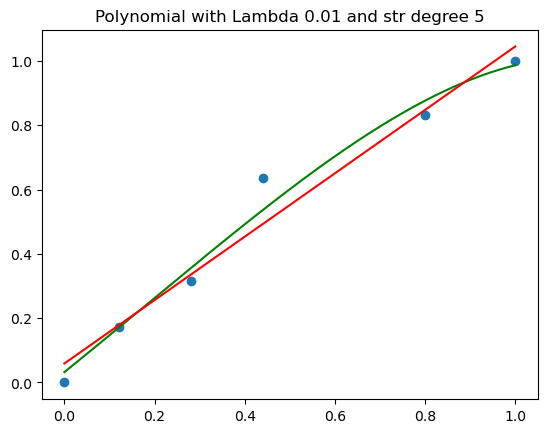

r2_score 0.9809539612050427
Coef [[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]]
intercept [0.03221785]


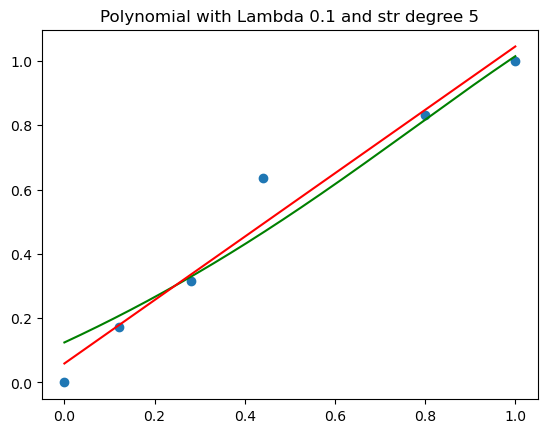

r2_score 0.9396437428481396
Coef [[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]]
intercept [0.12453362]


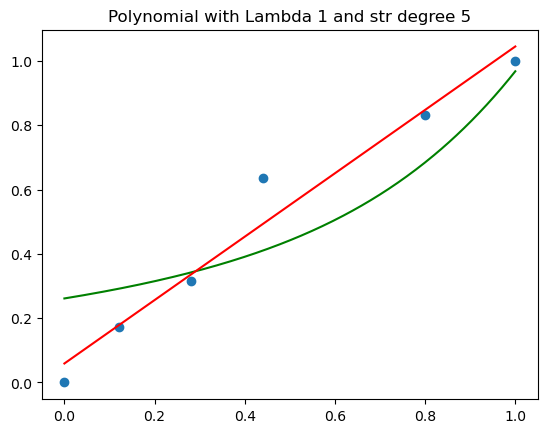

r2_score 0.7953946450161846
Coef [[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]]
intercept [0.26144094]


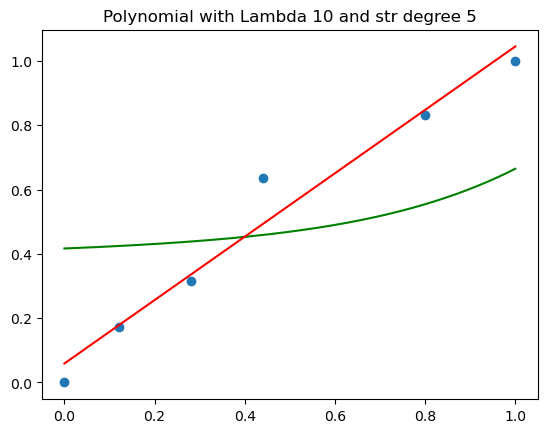

r2_score 0.38495051893643806
Coef [[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]]
intercept [0.41684269]


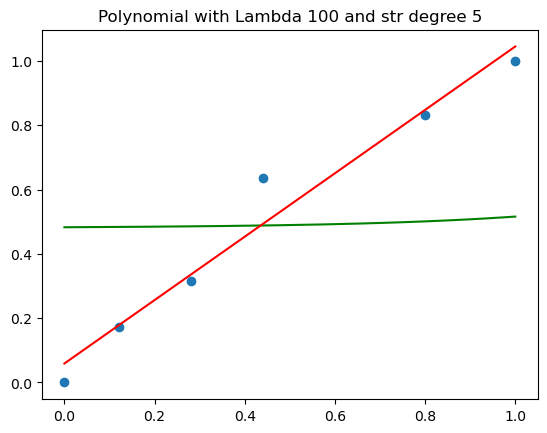

r2_score 0.058590880289601466
Coef [[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]]
intercept [0.48292692]


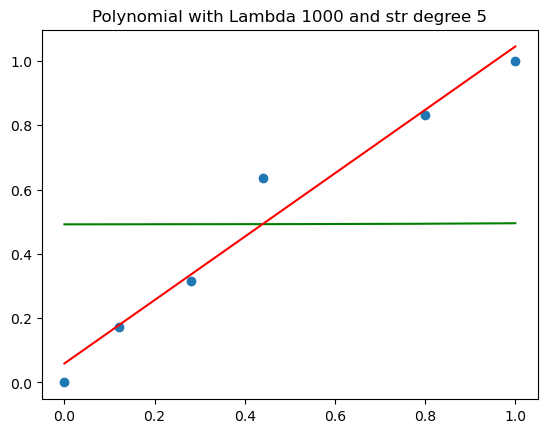

r2_score 0.006166338591997
Coef [[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]]
intercept [0.49199843]


In [53]:
ridgeRegression(X, np.linspace(X.min(), X.max(), 300).reshape(-1,1), 5)

## Lasso Regression

In [54]:
def lassoRegression(true_X, X_seq, degree):
    lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    
    for (i, value) in enumerate(lambdas):
        lassoCoef = PolynomialFeatures(degree=degree)
        X_poly = lassoCoef.fit_transform(true_X)
        lassoReg = Lasso(alpha=value)
        lassoReg.fit(X_poly, y)
        
        
        plt.title(f'Polynomial with Lambda {lambdas[i]} and str degree {degree}')
        plt.scatter(true_X, y)
        plt.plot(X_seq, lassoReg.predict(lassoCoef.fit_transform(X_seq)), color = 'green')
        plt.plot(X_seq, reg.predict(X_seq), color = 'red')
        plt.show()
        
        y_pred_ridge = lassoReg.predict(lassoCoef.fit_transform(X))
        print("r2_score", r2_score(y, y_pred_ridge))
        print("Coef", lassoReg.coef_)
        print("intercept", lassoReg.intercept_)

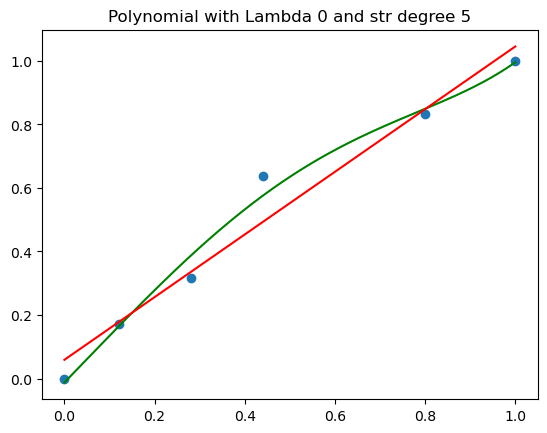

r2_score 0.9882107530558196
Coef [ 0.          1.46152502  0.16901155 -1.08666253 -0.14086504  0.60488725]
intercept [-0.01229983]


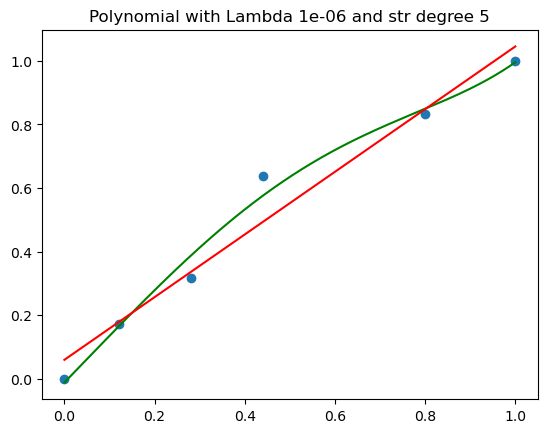

r2_score 0.9882018756011008
Coef [ 0.          1.46177897  0.16562928 -1.08205277 -0.13889419  0.60135677]
intercept [-0.0122564]


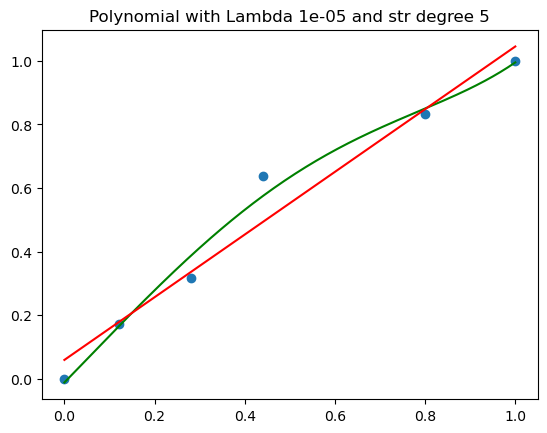

r2_score 0.988098985188847
Coef [ 0.          1.4656396   0.13032473 -1.04257996 -0.10639219  0.5601661 ]
intercept [-0.01191669]


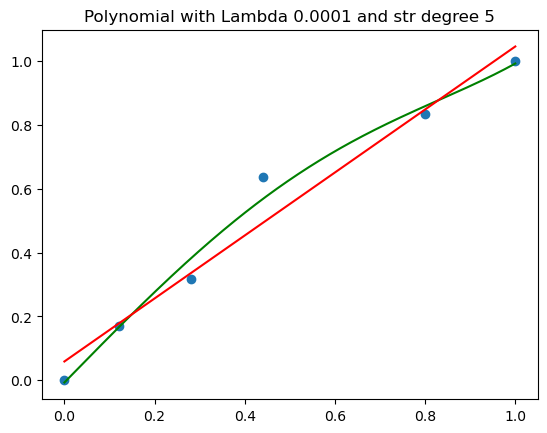

r2_score 0.9874215217574891
Coef [ 0.          1.44472672 -0.         -0.78348228 -0.          0.33753444]
intercept [-0.00669749]


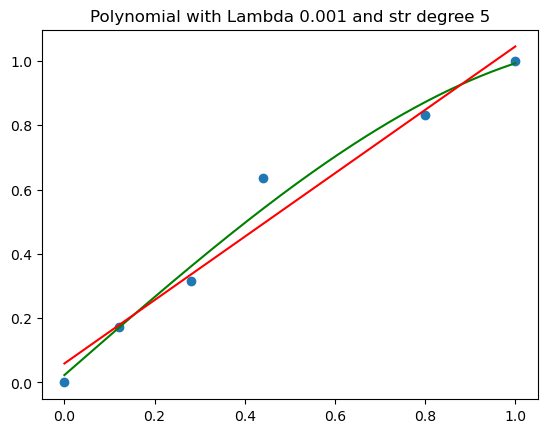

r2_score 0.9826605659196855
Coef [ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]
intercept [0.02302919]


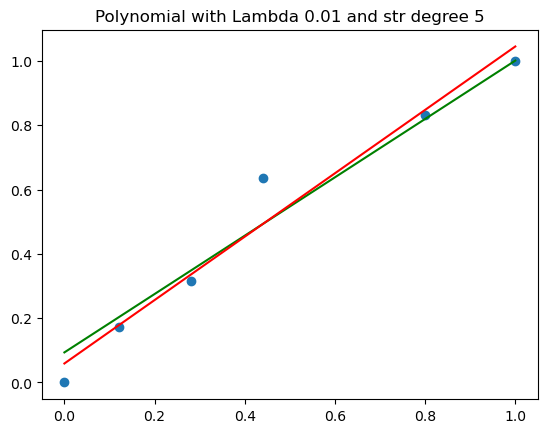

r2_score 0.9591121182494984
Coef [0.       0.907835 0.       0.       0.       0.      ]
intercept [0.09359742]


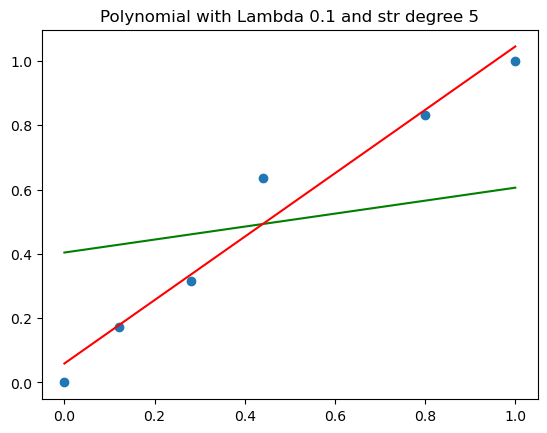

r2_score 0.3545216110743442
Coef [0.         0.20176806 0.         0.         0.         0.        ]
intercept [0.40426688]


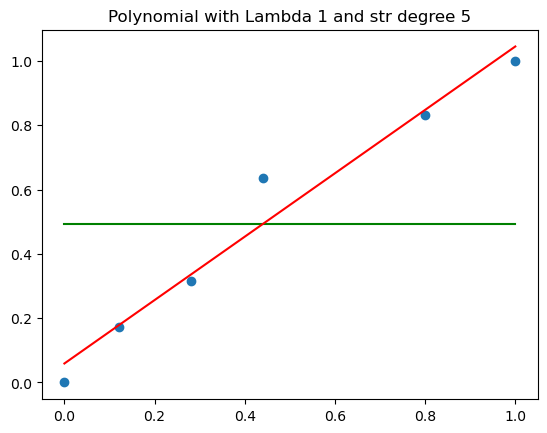

r2_score 0.0
Coef [0. 0. 0. 0. 0. 0.]
intercept [0.49304482]


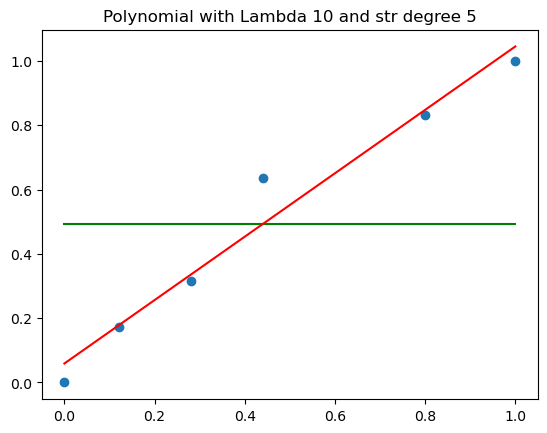

r2_score 0.0
Coef [0. 0. 0. 0. 0. 0.]
intercept [0.49304482]


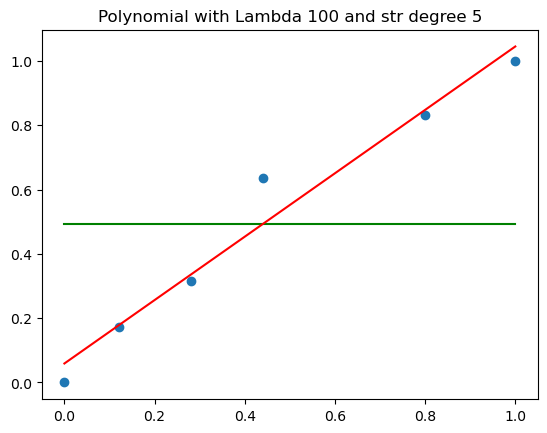

r2_score 0.0
Coef [0. 0. 0. 0. 0. 0.]
intercept [0.49304482]


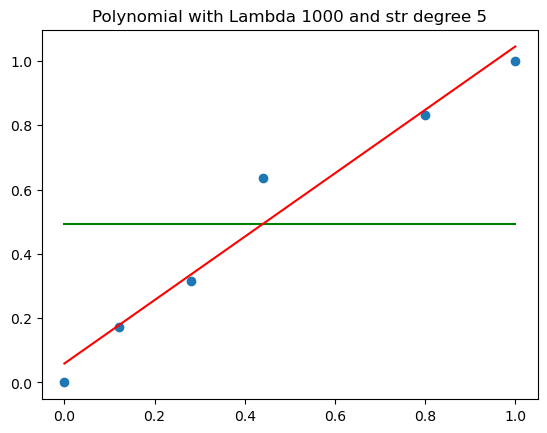

r2_score 0.0
Coef [0. 0. 0. 0. 0. 0.]
intercept [0.49304482]


In [55]:
lassoRegression(X, np.linspace(X.min(), X.max(), 300).reshape(-1,1), 5)

In [58]:
# Best Lambda value is 0.001. Putting the coef values from that model
l_coef = [ 0, 1.22414556, 0, 0.25396979, 0, 0]
r_coef = [ 0, 1.3870223, 0.12292763, -0.68649391, -0.38094524, 0.55241207]
p_coef = [ 0, 2.94295226, -19.85351777, 71.18543313,
        -95.27426562,  41.99939801]

betas = pd.DataFrame(index=['1', 'x', 'x2', 'x3', 'x4', 'x5'],
                    columns=['Polinomials', 'Ridge', 'Lasso'])
betas['Polinomials'] = p_coef
betas['Ridge'] = r_coef
betas['Lasso'] = l_coef

betas

,Polinomials,Ridge,Lasso
1,0.000000,0.000000,0.000000
x,2.942952,1.387022,1.224146
x2,-19.853518,0.122928,0.000000
x3,71.185433,-0.686494,0.253970
x4,-95.274266,-0.380945,0.000000
x5,41.999398,0.552412,0.000000
